In [5]:
from pytdx.config.hosts import hq_hosts
import pandas as pd
from pytdx.hq import TdxHq_API
import seaborn as sns

In [29]:
index_lst = [(1, '000001','sh'), 
          (0, '399001','sz'), 
          (0, '399006','cyb')]

index = index_lst[0]

In [30]:
api = TdxHq_API()
host = hq_hosts[7]
n = 480   # datapoint rolling window
m = 2    # sigma width
df_lst = []
if api.connect(host[1], host[2]):
    print('Success')
    for i in range(4):
        df_lst += [api.to_df(api.get_index_bars(9, index[0], index[1], 0, 500))] # day k lines
        df_lst += [api.to_df(api.get_index_bars(2, index[0], index[1], 0, 500))] # 30 min k lines
        df_lst += [api.to_df(api.get_index_bars(0, index[0], index[1], 0, 500))] # 5 min k lines
        df_lst += [api.to_df(api.get_index_bars(8, index[0], index[1], 0, 500))] # 1 min k lines
        
    api.disconnect()

Success


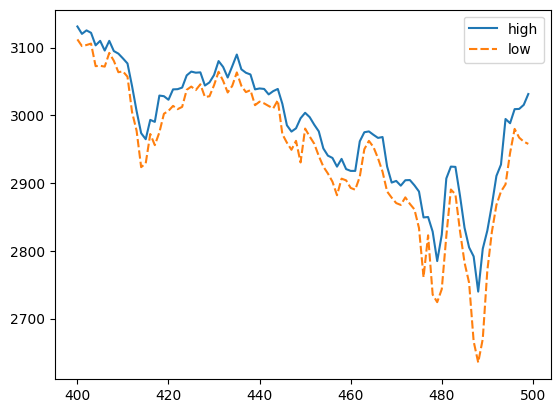

In [31]:
data = df_lst[0].tail(100)
sns.lineplot(data=data[['high','low']]); # day

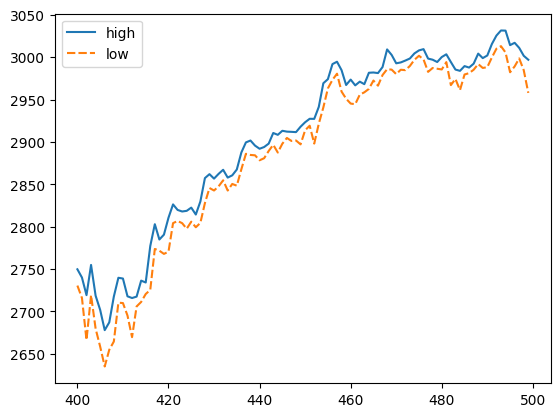

In [32]:
data = df_lst[1].tail(100)
sns.lineplot(data=data[['high','low']]); # 30 min

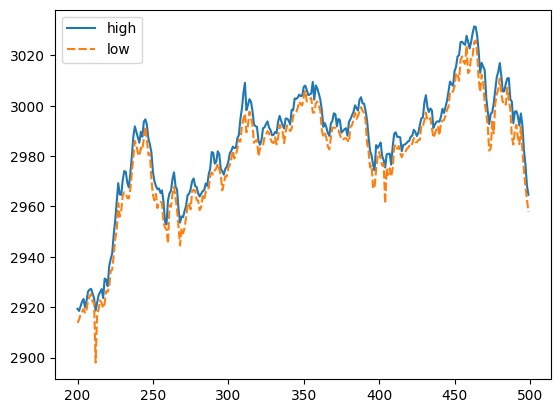

In [33]:
data = df_lst[2].tail(300)
sns.lineplot(data=data[['high','low']]); # 5 min

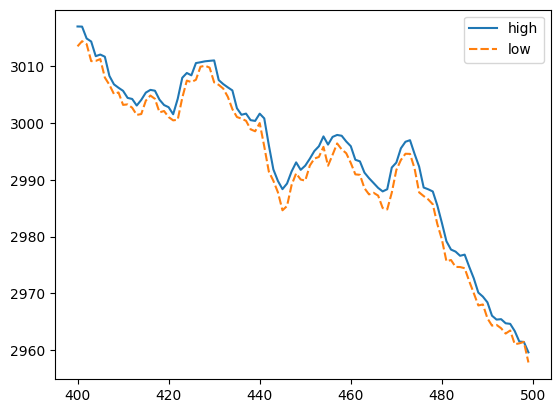

In [34]:
data = df_lst[3].tail(100)
sns.lineplot(data=data[['high','low']]); # 1 min

In [35]:
# n = 480   # datapoint rolling window
# m = 2    # sigma width
# boll5 = bollinger_bands(data5, n, m)
# boll5_fix = boll5.loc[~boll5['B_MA'].isnull()]
# sns.lineplot(data=boll5_fix[['high','low']], markers=True, dashes=False);
# sns.lineplot(data=boll5_fix[['B_MA','BU','BL']], markers=False, dashes=False);